# LendingLoan's Loan Data Analysis Project

###### Problem: Explore publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. 
##### Create a model that will help predict this.

## Findings

1. Most of the customers meet the credit underwriting criteria of LendingClub since the mean of credit policy > 0.5 and the number of such customers = 7710
2. The fico score of the customers mean and median are satisfactory, this means they can get credit but most of them had not paid the credit (mean= 0.16, count = 8045),so their credit worthiness is a question mark.  This is what we have to predict.
3. Fico column is almost normally distributed.
4. The most common purpose for borrowing is debt_consolidation and the least is educational purpose.
5.  out of these features, we find 'pub.rec' feature providing least contribution since it is least correlated with the other features. SO we can drop this.
5. Customers with higher fico score belonged to credit_policy = 1 group

6. we can see that the probabilty of customer not fulfilling the criteria of Loan Bank for the credit and actually not paying back the loan. while customer not paying the loan back even when they stand on the credit rating policy of the bank is large. So, clearly the bank's policy need to be updated and make some positive changes.

7. For customers with high fico score, the interest rate decreases, which makes sense. This is also calculated by the correlation matrix, that as fico score decreases, the interest rate paid by the customers also increases. As a result, there is an increase in the cases of not repaying the loan back.
8. The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available) increases as the FICO score falls. It was also calculated by the correlation matrix.
9. More than 5000 times, the creditors had to call the borrowers for the loan repayment atleast 5 times in the cases where the loans are not fully paid. This increases further the cost for the creditors.
11. Average number of inquiry calls in the last 6 months have gone up for the credit rating 0 customers who have not paid the loan amount fully
12. It shows default instances of loans not being fully paid and the instances loans were paid across different purposes as sought by the customers. So, Creditos will have to be wary of the exact purpose the customers want loans for. For eg. there are very high number of cases of loans not being paid in debt consolidation purpose while it is least for small business and educational purposes.

*****Model***
                - Accuracy from Decision Tree method was 74%
                - Accuracy from Random Forest Algorithm was 85%
        - So, we can say that Random Forest performed better.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
# Most of the customers meet the credit underwriting criteria of LendingClub 
#since the mean of credit policy > 0.5

In [10]:
# The fico score of the customers mean and median are satisfactory, this means they can get credit
#but most of them had not paid the credit (mean= 0.16),so their credit worthiness is a question mark.
# This is what we have to predict

In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## EDA

#### 1. Univariate Analysis

In [15]:
pd.crosstab(index = df['credit.policy'], columns = 'count')

col_0,count
credit.policy,
0,1868
1,7710


In [17]:
pd.crosstab(index = df['not.fully.paid'], columns = 'count')

col_0,count
not.fully.paid,
0,8045
1,1533


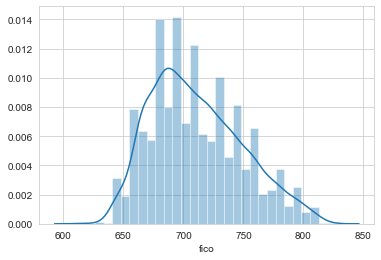

In [128]:
# sns.distplot(df['fico'], kde = True)
sns.distplot(df['fico'], kde = True, bins = 30)

the distribution above is almost normal

In [30]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

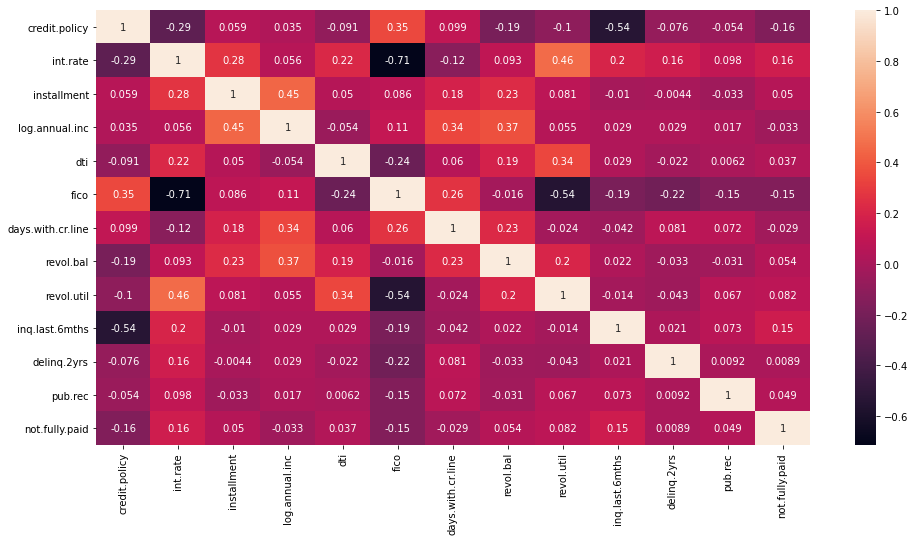

In [32]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# out of these features, we find 'pub.rec' feature providing least contribution 
# since it is least correlated with the other features. SO we can drop this.

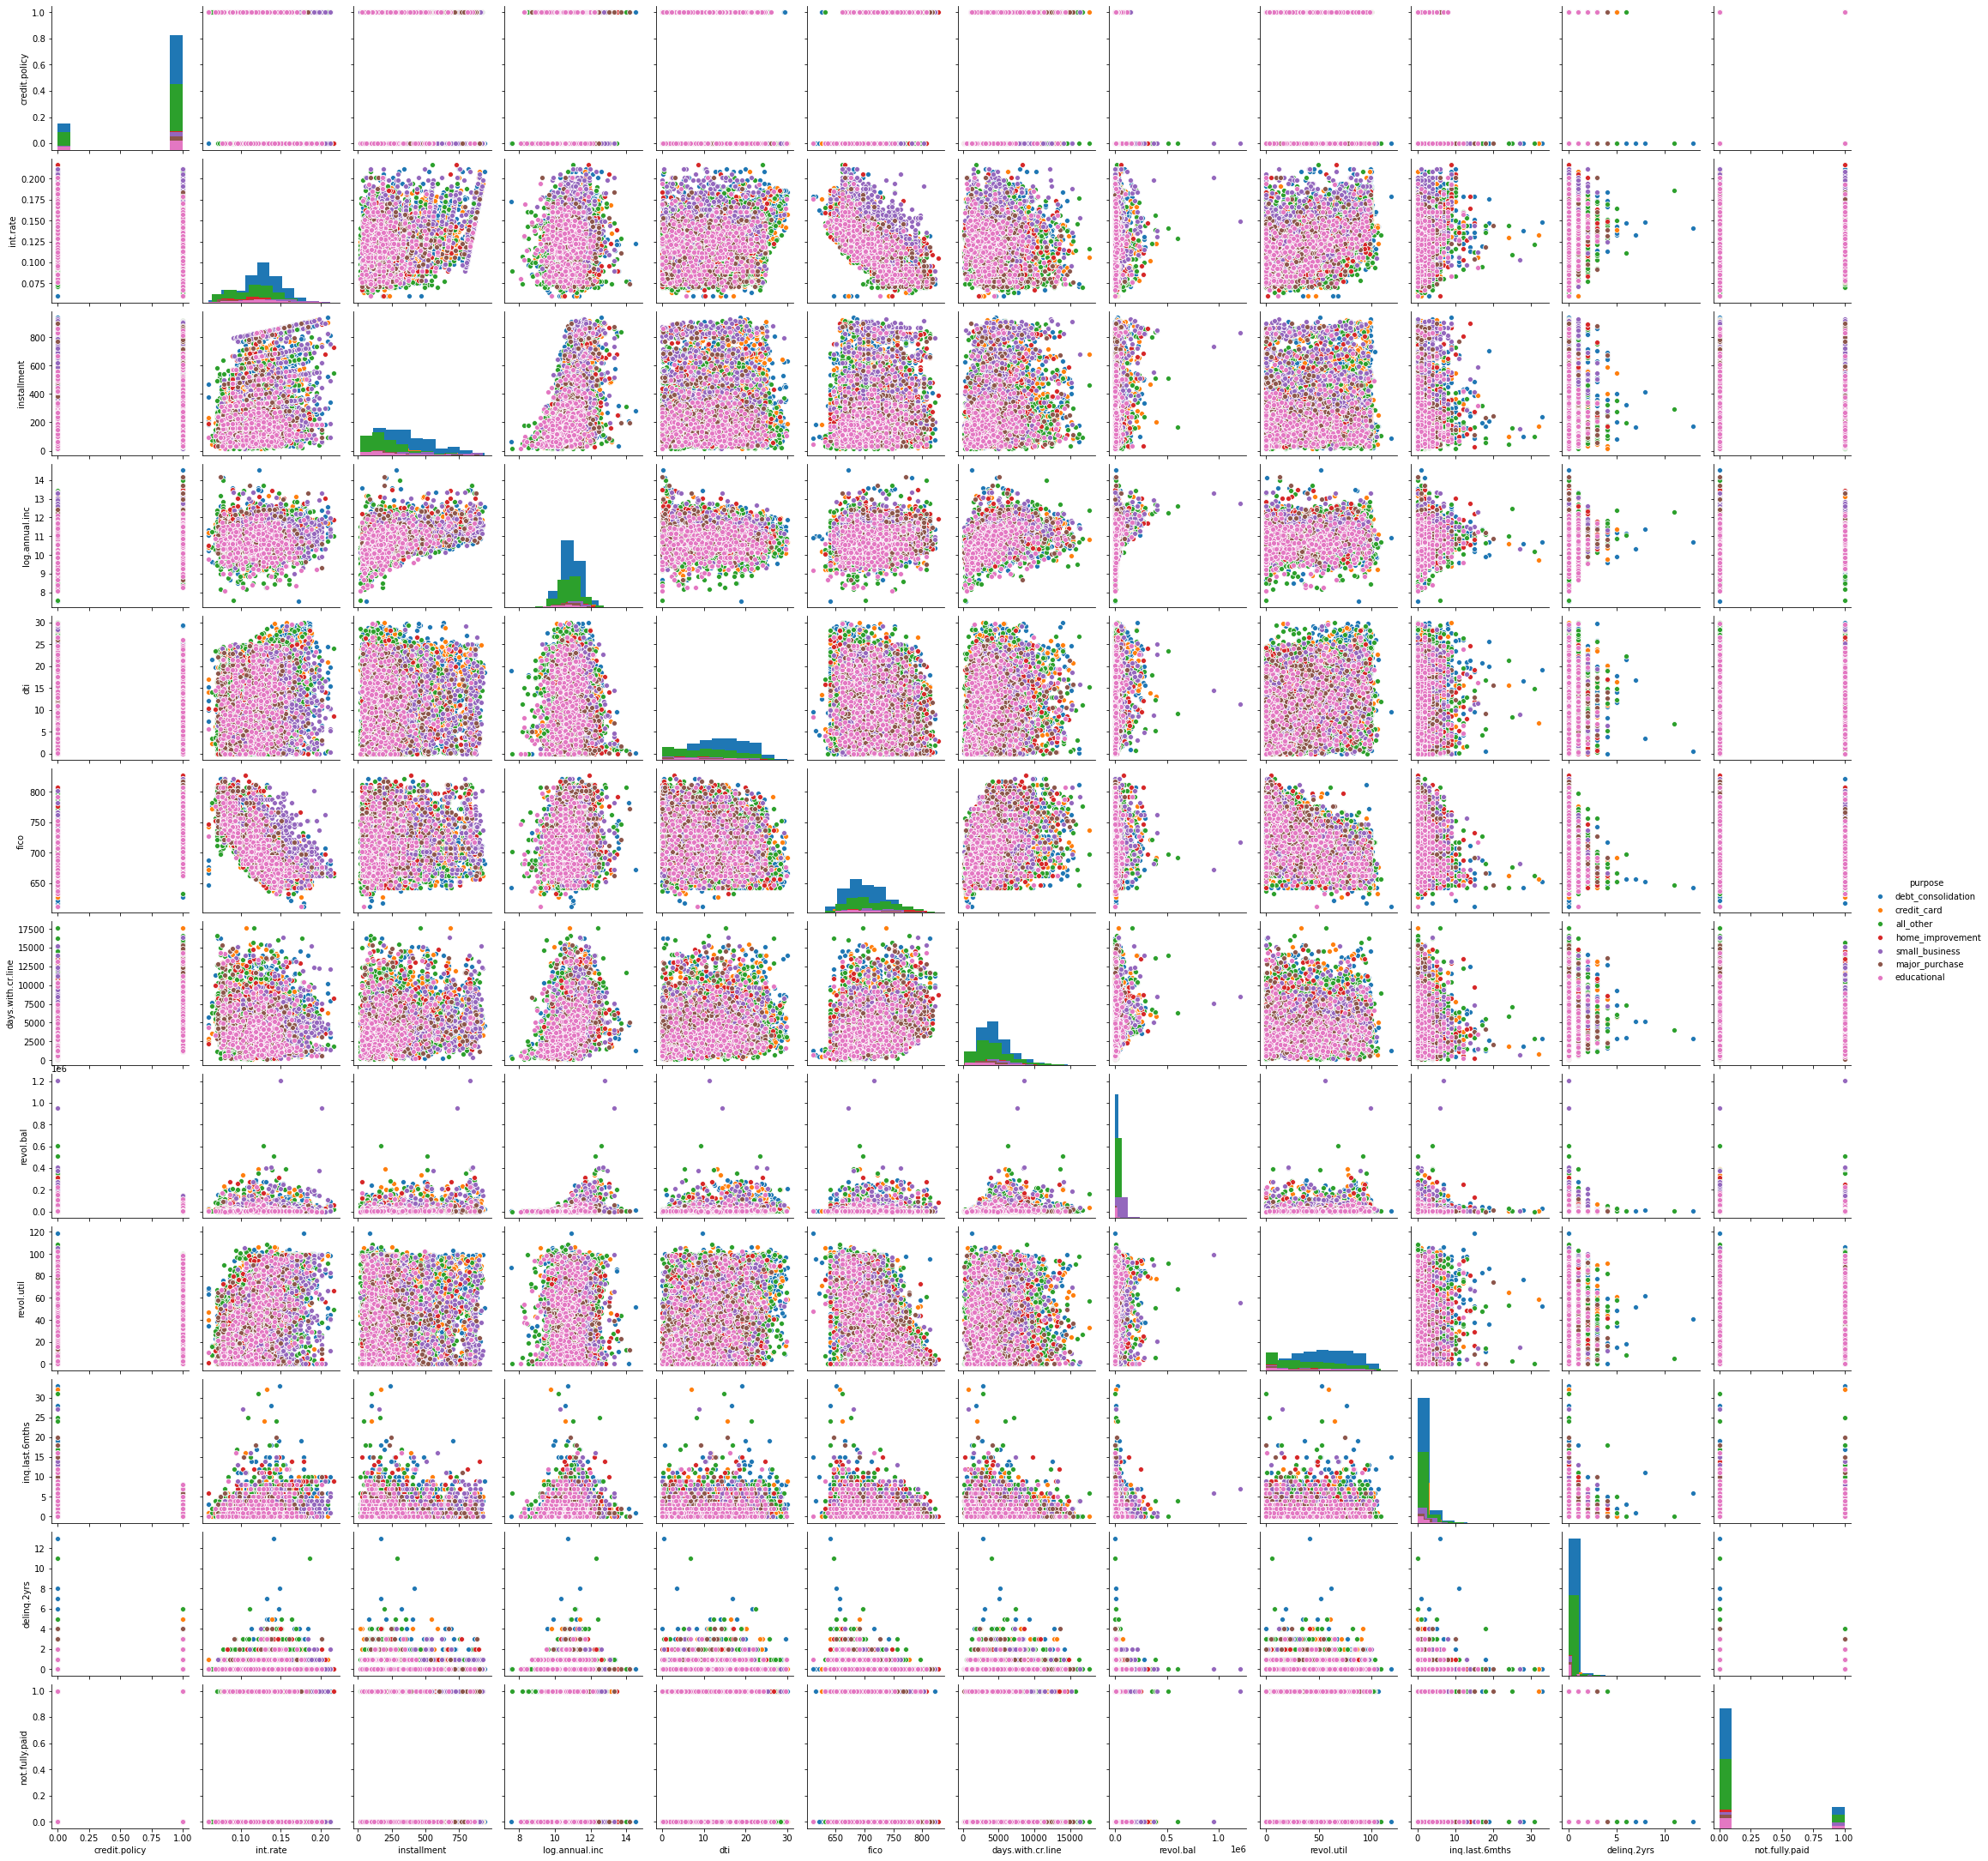

In [33]:
sns.pairplot(df.drop('pub.rec', axis=1), hue = 'purpose', diag_kind = 'hist')

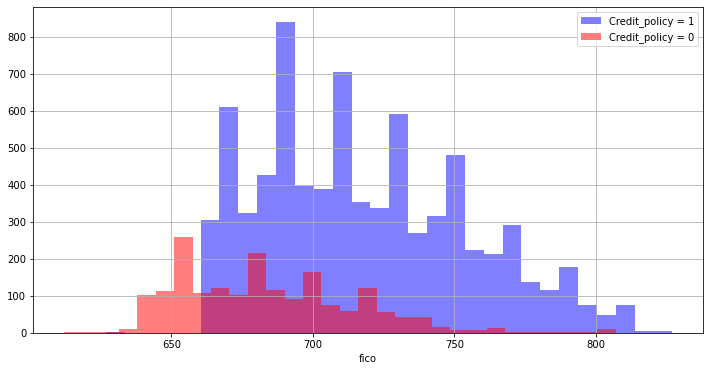

In [48]:
plt.figure(figsize= (12,6))

df[df['credit.policy']== 1]['fico'].hist(
    alpha = 0.5, color= 'blue', bins = 30, label = 'Credit_policy = 1')
df[df['credit.policy']== 0]['fico'].hist(
    alpha = 0.5, color= 'red', bins= 30, label = 'Credit_policy = 0')

plt.xlabel('fico')
plt.legend()

From the histogram, it appears that the FICO score should be close to 660 for the customers to meet the requirements under credit policy rating

Customers with higher fico score belonged to credit_policy = 1 group

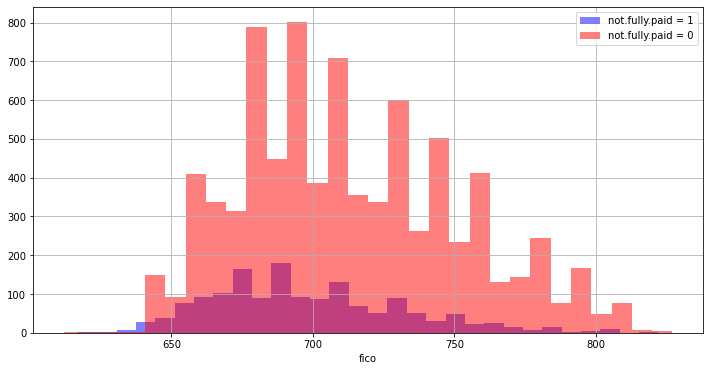

In [54]:
plt.figure(figsize= (12,6))

df[df['not.fully.paid']== 1]['fico'].hist(
    alpha = 0.5, color= 'blue', bins = 30, label = 'not.fully.paid = 1')
df[df['not.fully.paid']== 0]['fico'].hist(
    alpha = 0.5, color= 'red', bins= 30, label = 'not.fully.paid = 0')

plt.xlabel('fico')
plt.legend()

Large number of customers did not pay their loans back (numbers = 8045) and they took the advantage of their respective high fico scores

0.1221

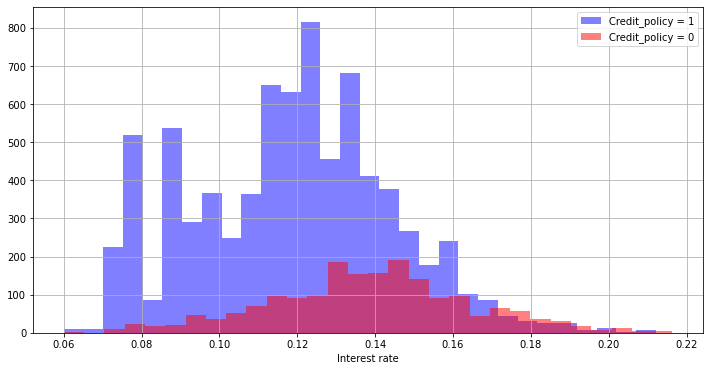

In [51]:
plt.figure(figsize= (12,6))

df[df['credit.policy']== 1]['int.rate'].hist(
    alpha = 0.5, color= 'blue', bins = 30, label = 'Credit_policy = 1')
df[df['credit.policy']== 0]['int.rate'].hist(
    alpha = 0.5, color= 'red', bins= 30, label = 'Credit_policy = 0')

plt.xlabel('Interest rate')
plt.legend()
df['int.rate'].median()

Large number of customers with credit_policy rating 1 had to pay lower interest rate than the median interest rate

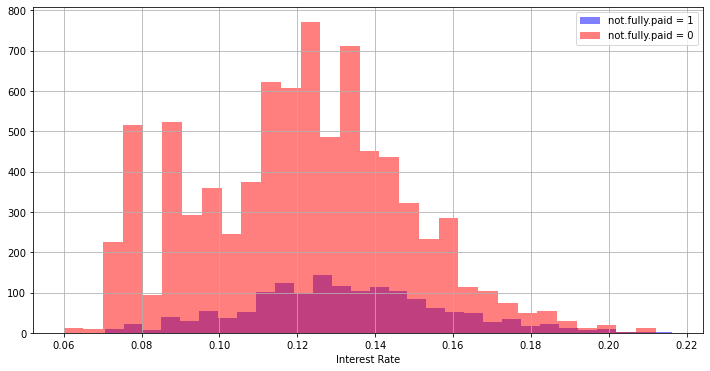

In [56]:
plt.figure(figsize= (12,6))

df[df['not.fully.paid']== 1]['int.rate'].hist(
    alpha = 0.5, color= 'blue', bins = 30, label = 'not.fully.paid = 1')
df[df['not.fully.paid']== 0]['int.rate'].hist(
    alpha = 0.5, color= 'red', bins= 30, label = 'not.fully.paid = 0')

plt.xlabel('Interest Rate')
plt.legend()

Large number of customers did not pay their loans back (numbers = 8045) and they took the advantage of their respective lower interest rates. So this further increased their burden

In [58]:
df.groupby('not.fully.paid')['credit.policy'].value_counts()

not.fully.paid  credit.policy
0               1                6696
                0                1349
1               1                1014
                0                 519
Name: credit.policy, dtype: int64

In [64]:
print(pd.crosstab(index = df['not.fully.paid'], columns = df['credit.policy'], 
            normalize = False, margins= True, dropna = True))

print("***************** \n\n")

print(pd.crosstab(index = df['not.fully.paid'], columns = df['credit.policy'], 
            normalize = True, margins= True, dropna = True))

credit.policy      0     1   All
not.fully.paid                  
0               1349  6696  8045
1                519  1014  1533
All             1868  7710  9578
***************** 


credit.policy          0         1       All
not.fully.paid                              
0               0.140844  0.699102  0.839946
1               0.054187  0.105868  0.160054
All             0.195030  0.804970  1.000000


So, we can see that the probabilty of customer not fulfilling the criteria of Loan Bank for the credit and actually not paying back the loan. while customer not paying the loan back even when they stand on the credit rating policy of the bank is large. 

So, clearly the bank's policy need to be updated and make some positive changes.

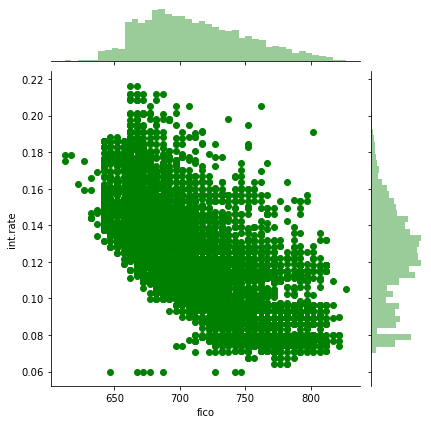

In [65]:
sns.jointplot(x= 'fico', y= 'int.rate', data= df, color= 'green')

For customers with high fico score, the interest rate decreases, which makes sense. 

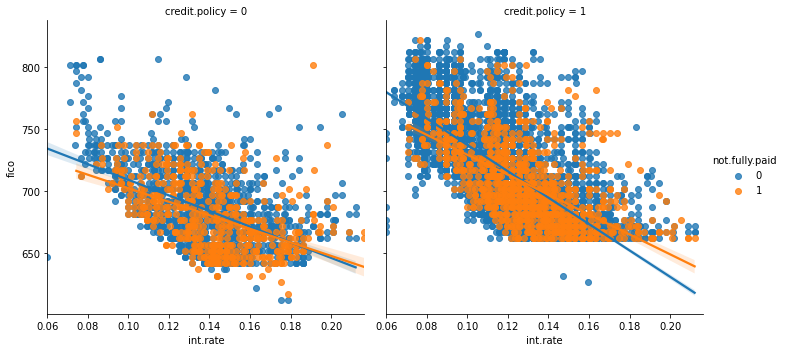

In [67]:
sns.lmplot(x = 'int.rate', y ='fico', data = df, fit_reg= True, 
           col ='credit.policy', hue= 'not.fully.paid' ) 

this is also calculated by the correlation matrix, that as fico score decreases, the interest rate paid by the customers also increases. As a result, there is an increase in the cases of not repaying the loan back.

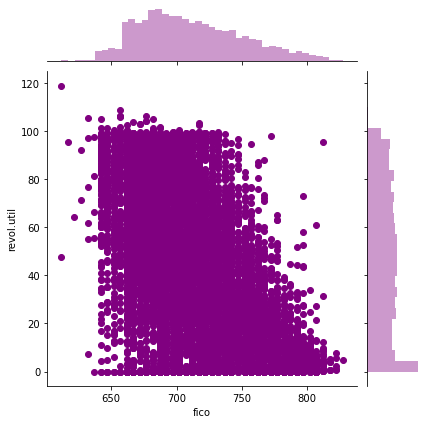

In [74]:
sns.jointplot(x= 'fico', y= 'revol.util', data= df, color= 'purple')

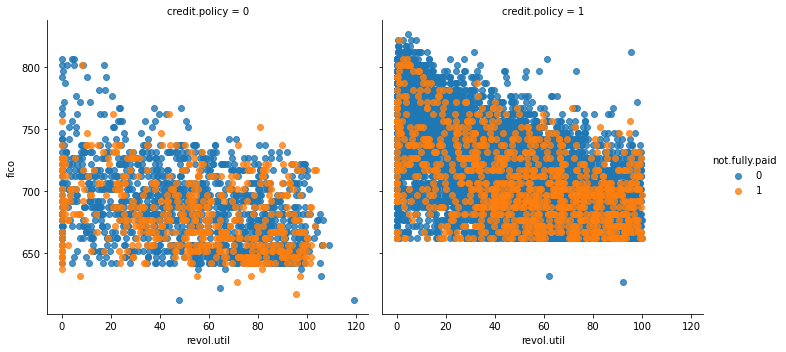

In [73]:
sns.lmplot(x = 'revol.util', y ='fico', data = df, fit_reg= False, 
           col ='credit.policy', hue= 'not.fully.paid' ) 

The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available) increases as the FICO score falls. It was also calculated by the correlation matrix.

In [80]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

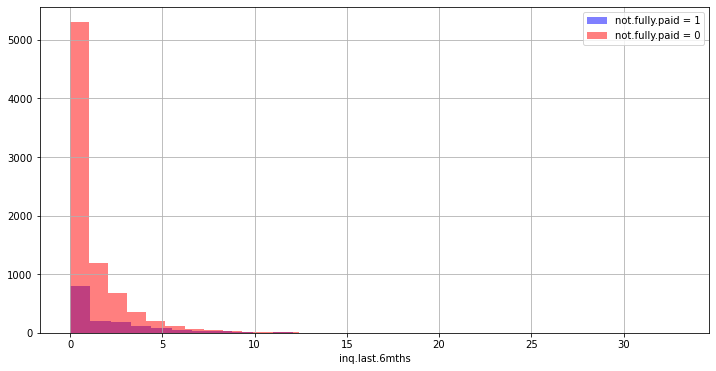

In [82]:
plt.figure(figsize= (12,6))

df[df['not.fully.paid']== 1]['inq.last.6mths'].hist(
    alpha = 0.5, color= 'blue', bins = 30, label = 'not.fully.paid = 1')
df[df['not.fully.paid']== 0]['inq.last.6mths'].hist(
    alpha = 0.5, color= 'red', bins= 30, label = 'not.fully.paid = 0')

plt.xlabel('inq.last.6mths')
plt.legend()

More than 5000 times, the creditors had to call the borrowers for the loan repayment atleast 5 times in the cases where the loans are not fully paid. This increases further the cost for the creditors. 

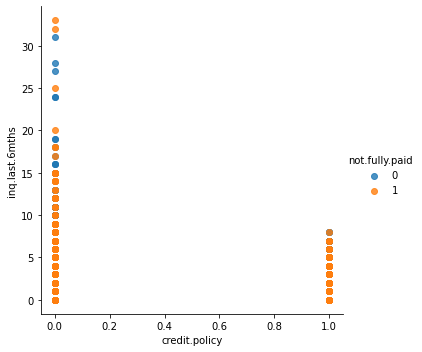

In [84]:
sns.lmplot(x= 'credit.policy', y='inq.last.6mths', data = df, 
           hue = 'not.fully.paid', fit_reg= False)

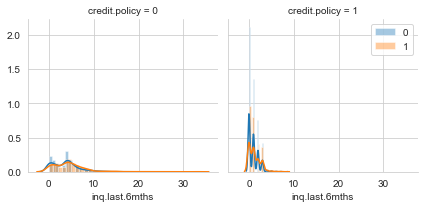

In [95]:
# sns.set_style(style='whitegrid')

g = sns.FacetGrid(data = df, col = 'credit.policy', hue = 'not.fully.paid')
g.map(sns.distplot, 'inq.last.6mths')
plt.legend()

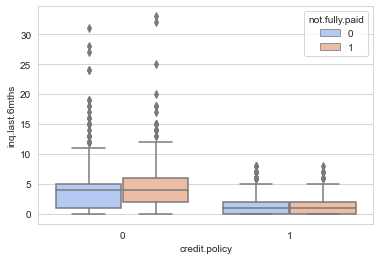

In [96]:
sns.boxplot(x="credit.policy",y="inq.last.6mths",
            hue="not.fully.paid",data=df, palette="coolwarm")

Average number of inquiry calls in the last 6 months have gone up for the credit rating 0 customers who have not paid the loan amount fully

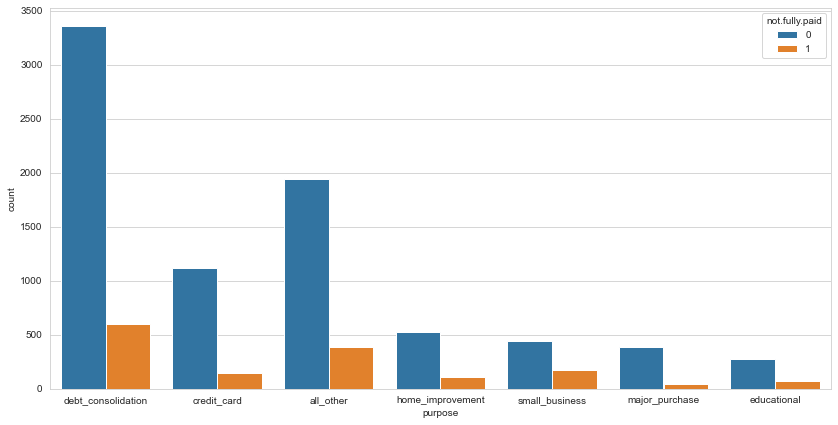

In [101]:
plt.figure(figsize = (14,7))
sns.countplot(x= 'purpose', hue= 'not.fully.paid', data = df)

It shows default instances of loans not being fully paid and the instances loans were paid across different purposes as sought by the customers. So, Creditos will have to be wary of the exact purpose the customers want loans for. For eg. there are very high number of cases of loans not being paid in debt consolidation purpose while it is least for small business and educational purposes. 

In [102]:
# joint probability
pd.crosstab(index = df['not.fully.paid'], columns= df['purpose'], normalize = True)

purpose,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
not.fully.paid,,,,,,,
0,0.202965,0.116517,0.350177,0.028607,0.054500,0.040510,0.046669
1,0.040405,0.015243,0.062957,0.007204,0.011171,0.005116,0.017958


EDA is now over. Lets move onto applying Random Forest method (why because the problem asks us to predict the cases of defaulting on loans

#### Categorical Features

To be able to use SkLearn, we need to convert the categorical feature into a dummy variable.

In [3]:
cat_feats = ['purpose']

In [4]:
final_data = pd.get_dummies(df, columns = cat_feats, drop_first = True)

In [106]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### train_test_split

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X = final_data.drop('not.fully.paid', axis = 1)
y= final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, 
                                                    stratify= y)

### Training a Decision Tree Model

In [8]:
# Single Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
print(confusion_matrix(y_test, predictions))
print('******* \n\n')
print(classification_report(y_test, predictions))

[[1992  439]
 [ 339  104]]
******* 


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators= 300)

In [123]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [124]:
rfc_predictions = rfc.predict(X_test)

In [126]:
print(confusion_matrix(y_test, rfc_predictions)) 
print("***** \n\n")
print(classification_report(y_test, rfc_predictions))

[[2422    9]
 [ 433   10]]
***** 


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



Accuracy improved in the random forest ML algorithm. but if we nickpick the recall for the not fully paid = 1, the decision tree algo performed better (0.22 than 0.02)

In [8]:
X = final_data.drop('not.fully.paid', axis = 1)
y= final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, 
                                                    stratify= y)

In [12]:
rfc = RandomForestClassifier(n_estimators= 300)
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)


print(confusion_matrix(y_test, rfc_predictions)) 
print("***** \n\n")
print(classification_report(y_test, rfc_predictions))

[[2395   19]
 [ 453    7]]
***** 


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.27      0.02      0.03       460

    accuracy                           0.84      2874
   macro avg       0.56      0.50      0.47      2874
weighted avg       0.75      0.84      0.77      2874



In [19]:
#svc
from sklearn.svm import SVC
model = SVC(kernel= 'rbf', C= 0.1, gamma= 0.05)

In [20]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.05)

In [21]:
pred = model.predict(X_test)

In [22]:
print(confusion_matrix(y_test, pred))
print('***** \n\n')
print(classification_report(y_test, pred))

[[2414    0]
 [ 460    0]]
***** 


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



C:\Users\master\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [30]:
rfc = RandomForestClassifier(class_weight= {0: 1, 1:1001})

In [31]:
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)


print(confusion_matrix(y_test, rfc_predictions)) 
print("***** \n\n")
print(classification_report(y_test, rfc_predictions))

[[2411    3]
 [ 456    4]]
***** 


              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.57      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.71      0.50      0.47      2874
weighted avg       0.80      0.84      0.77      2874

